# `Libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# `Dataset :`

## ` Dataset :`

In [2]:
df = pd.read_csv('bhppm.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## ` E D A : `

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

 - Useless Columns : 
            
`area_type` `availability` `society` `balcony`


In [5]:
df.drop(
    columns=['area_type','availability','society','balcony'],
    inplace=True
    )

In [6]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.shape

(13320, 5)

In [8]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [9]:
df.select_dtypes(include='number').columns.to_list()

['bath', 'price']

In [10]:
df.select_dtypes(include='object').columns.to_list()

['location', 'size', 'total_sqft']

In [11]:
def my_uniques():
    for i in df.columns:
        print(f"{i} : \nTotal values         : {df[i].value_counts().sum()}")
        print(f"No. of Unique Values : {df[i].nunique()}\n")
        
my_uniques()        

location : 
Total values         : 13319
No. of Unique Values : 1305

size : 
Total values         : 13304
No. of Unique Values : 31

total_sqft : 
Total values         : 13320
No. of Unique Values : 2117

bath : 
Total values         : 13247
No. of Unique Values : 19

price : 
Total values         : 13320
No. of Unique Values : 1994



## ` Data Cleaning : `

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [13]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [14]:
def nulls():
    for i in df.columns:
        print(f"{i:>10} : {df[i].isnull().sum()}")
        
nulls()

  location : 1
      size : 16
total_sqft : 0
      bath : 73
     price : 0


- `step 1 :` 
    - location contains 1 null values will be filled in dimentionality reduction (because of many unique values )

- `step 2 :`
    - extraction numberical column from the size column and conerting to int 
    - filling null values in size column by mean

- `step 3 :`
    - filling null values of bath columns by median



In [15]:
df['size'].head()

0        2 BHK
1    4 Bedroom
2        3 BHK
3        3 BHK
4        2 BHK
Name: size, dtype: object

In [16]:
# extracting the numerical data from the column : 
df['bhk'] = df['size'].str.extract(r'(\d+)')

# converting to float : 
df['bhk'] = df['bhk'].astype(float)

# filling the null values  : 
df['bhk'] = df['bhk'].fillna(df['bhk'].mean())

In [17]:
# now here size column is use less we can remove it 

df.drop(columns=['size'], inplace=True)

In [18]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [19]:
nulls()

  location : 1
total_sqft : 0
      bath : 0
     price : 0
       bhk : 0


## ` Feature Engineering : `

In [20]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [21]:
df.dtypes

location       object
total_sqft     object
bath          float64
price         float64
bhk           float64
dtype: object

- `step 1 : `
    - total square feet should be float but it is object and it contains ranges
    - solving ranges in total sqft and converting to float

- `step 2 :`
    - price should be per square feet
    

In [22]:
def is_float(x):
    try :
        float(x)
    except : 
        return False
    return True

In [23]:
df['total_sqft'].apply(is_float).head()

0    True
1    True
2    True
3    True
4    True
Name: total_sqft, dtype: bool

In [24]:
df[~df['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,3010 - 3410,2.0,192.000,4.0
81,Hennur Road,2957 - 3450,2.0,224.500,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0


In [25]:
def convert_to_float(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2
    try : 
        return float(x)
    except :
        return None

In [26]:
df['total_sqft'].apply(convert_to_float).head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [27]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_float)

In [28]:
nulls()

  location : 1
total_sqft : 46
      bath : 0
     price : 0
       bhk : 0


In [29]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [30]:
(df['price']*100000/df['total_sqft']).head()

0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
dtype: float64

In [31]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [32]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


## `Dimentionality Reduction : `

In [33]:
nulls()

  location : 1
total_sqft : 0
      bath : 0
     price : 0
       bhk : 0
price_per_sqft : 0


In [34]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [35]:
df['location'] = df['location'].fillna('Whitefield')

- there are some location with value_counts 1 to 10 -> converting it into `others`
 to reduce dimensions

In [36]:
locations = df['location'].value_counts()
locations

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [37]:
locations_less_then_10 = locations[locations<=10]
locations_less_then_10

location
Kalkere                           10
Gunjur Palya                      10
Dodsworth Layout                  10
BTM 1st Stage                     10
Sadashiva Nagar                   10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1064, dtype: int64

In [38]:
df['location'] = df['location'].apply(lambda s : 'others' if s in locations_less_then_10 else s)
df['location'].value_counts()

location
others                2900
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [39]:
df[df['location']=='others']

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.00,6.0,36274.509804
18,others,2770.0,4.0,290.00,3.0,10469.314079
19,others,1100.0,2.0,48.00,2.0,4363.636364
24,others,510.0,1.0,25.25,1.0,4950.980392
25,others,1250.0,3.0,56.00,3.0,4480.000000
...,...,...,...,...,...,...
13291,others,812.0,1.0,26.00,1.0,3201.970443
13292,others,1440.0,2.0,63.93,3.0,4439.583333
13302,others,1075.0,2.0,48.00,2.0,4465.116279
13306,others,1200.0,5.0,325.00,4.0,27083.333333


In [40]:
df['location'] = df['location'].apply(lambda x: x.strip())

## `Outlier Removal on Business Logic : `

**Example : ASSUME THAT SQUARE FT PER BEDROOM IS 300 (I.E. 2 BHK APARTMENT IS MINIMUM 600 SQFT. IF YOU HAVE FOR EXAMPLE 400 SQFT APARTMENT WITH 2 BHK THAN THAT SEEMS SUSPICIOUS AND CAN BE REMOVED AS AN OUTLIER. WE WILL REMOVE OUTLIERS BY KEEPING OUR MINIMUM THRESOLD 300 SQFT**

In [41]:
df.shape

(13320, 6)

In [42]:
df[(df['total_sqft']/df['bhk'])<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,others,1350.0,7.0,85.0,8.0,6296.296296
70,others,500.0,3.0,100.0,3.0,20000.000000


In [43]:
# now total square feet per bhk should be greater than 300

df = df[(df['total_sqft']/df['bhk'])>300]

In [44]:
df.shape

(12390, 6)

## `Outlier Removal using Std and Mean : `

<Axes: ylabel='price_per_sqft'>

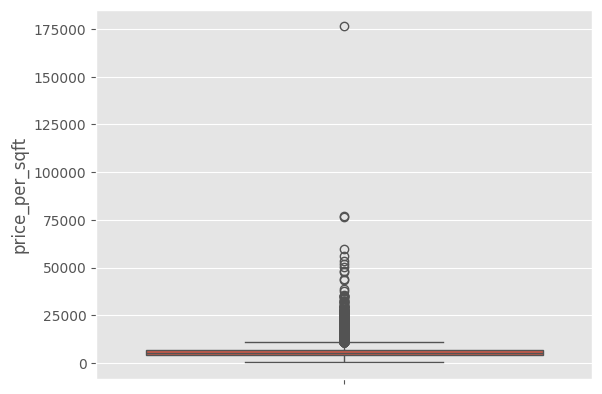

In [45]:
sns.boxplot(df['price_per_sqft'])

In [46]:
def remove_outliers_ppsft(df):
    df_out = pd.DataFrame()
    for key, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std = np.std(value.price_per_sqft)
        reduced_df = value[(value.price_per_sqft > (mean - std)) & (value.price_per_sqft <= (mean + std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [47]:
df = remove_outliers_ppsft(df)

<Axes: ylabel='price_per_sqft'>

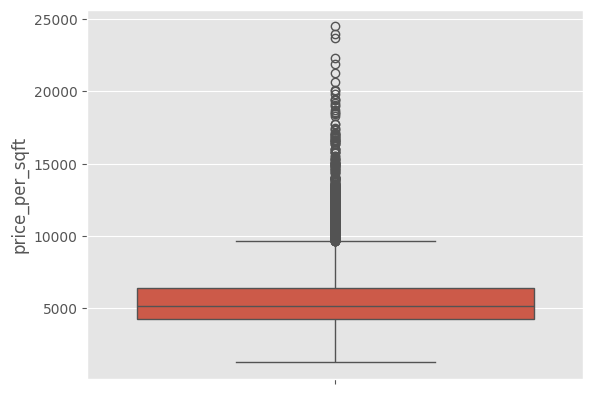

In [48]:
sns.boxplot(df['price_per_sqft'])

<Axes: ylabel='bhk'>

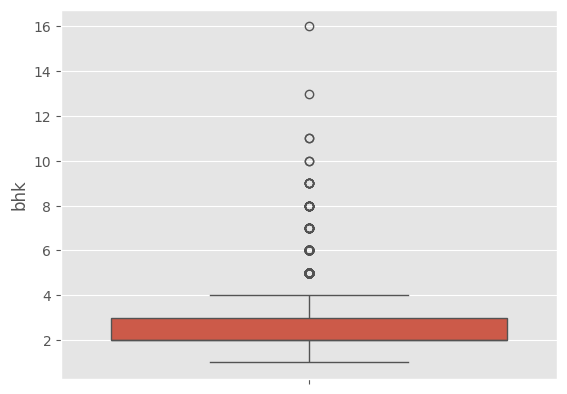

In [49]:
sns.boxplot(df['bhk'])

In [50]:
def remove_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

In [51]:
df = remove_outliers(df)

<Axes: ylabel='bhk'>

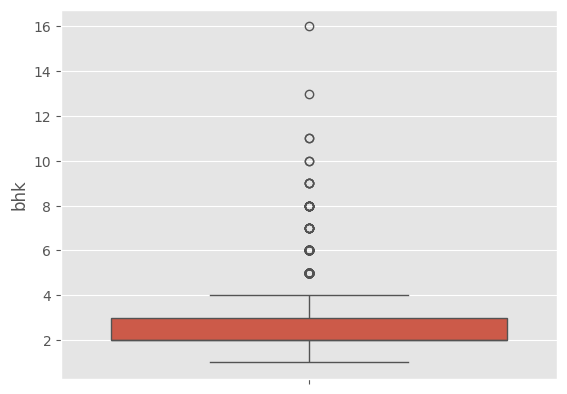

In [52]:
sns.boxplot(df['bhk'])

In [53]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7241.000000,7241.000000,7241.000000,7241.000000,7241.000000
mean,1501.921490,2.438061,99.066595,2.490957,6095.982892
std,866.223325,0.997959,93.386575,0.909045,2356.229134
min,340.000000,1.000000,10.000000,1.000000,1300.000000
25%,1100.000000,2.000000,50.000000,2.000000,4600.000000
50%,1266.000000,2.000000,73.430000,2.000000,5673.222390
75%,1682.000000,3.000000,112.000000,3.000000,6862.443503
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


## `Outlier Removal on Other Feaures : `

`A house should not contain more bathrooms than the bedrooms`

In [54]:
df = df[df.bath<df.bhk+2]

## `Some Visualization :`

- `Note : I have applied some functional transformers like log ,reciprocal, and sqrt but I have noticed that the model performance has decreased because of it so I ignore It `

In [55]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668


` correaltion matrix heamap :`

<Axes: >

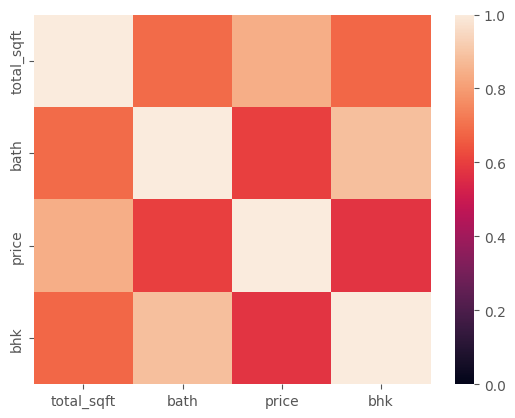

In [56]:
mat = df.drop(columns=['price_per_sqft']).select_dtypes(include='number').corr()
sns.heatmap(mat, vmin=0, vmax=1)

` Price vs bhk `

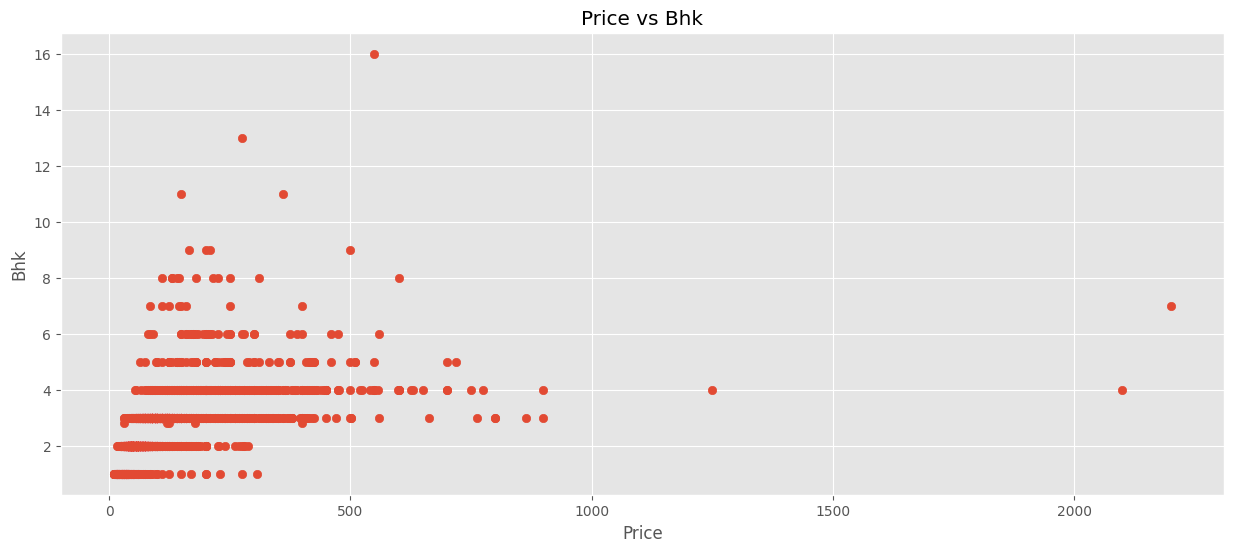

In [57]:
plt.figure(figsize=(15, 6))
plt.scatter(df['price'], df['bhk'])
plt.title("Price vs Bhk")
plt.xlabel("Price")
plt.ylabel("Bhk")

# uncomment the below and see the results :
# plt.xlim((0,600))
# plt.ylim((0,10))

plt.show()

` bath vs bhk :`

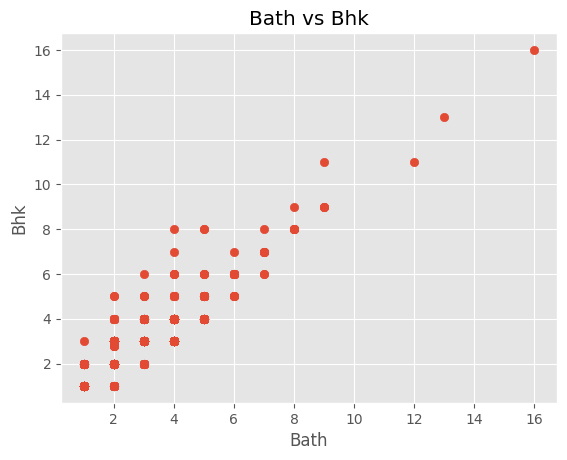

In [58]:
plt.scatter(df['bath'], df['bhk'])
plt.title("Bath vs Bhk")
plt.xlabel("Bath")
plt.ylabel("Bhk")
plt.show()

<Axes: xlabel='price', ylabel='Density'>

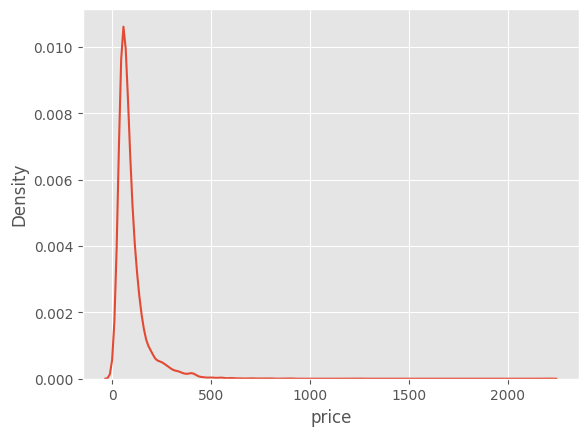

In [59]:
sns.kdeplot(df['price'])

<Axes: xlabel='total_sqft', ylabel='Density'>

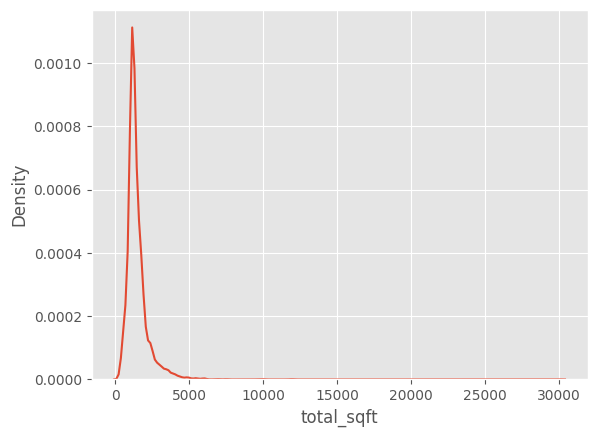

In [60]:
sns.kdeplot(df['total_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Density'>

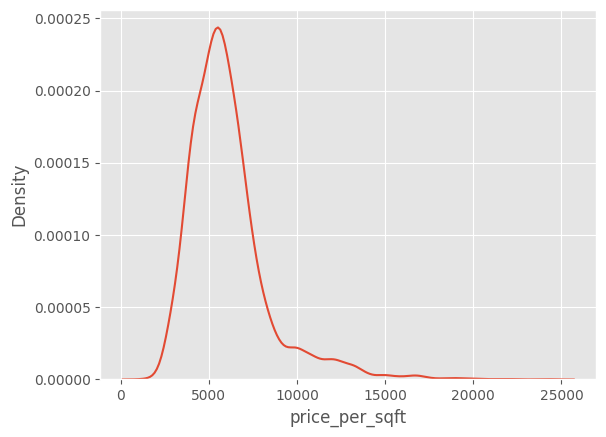

In [61]:
sns.kdeplot(df['price_per_sqft'])

## `One Hot Encoding : `

In [62]:
df = pd.get_dummies(df)

In [63]:
df.head()

,total_sqft,bath,price,bhk,price_per_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,2850.0,4.0,428.0,4.0,15017.543860,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,11901.840491,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3.0,12533.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3.0,10833.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2.0,11983.805668,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df.drop(columns=['price_per_sqft'], inplace=True)

In [65]:
for i in df.columns:
    print(f"\n--------------------\n{i} : ")
    print(f"Null values         : {df[i].isnull().sum()}")
    print(f"No of unique values : {df[i].nunique()}")
    print(f"Datatype            : {df[i].dtype}")
    
    if df[i].nunique() <=10 :
        print(f"\n{df[i].unique()}")


--------------------
total_sqft : 
Null values         : 0
No of unique values : 1502
Datatype            : float64

--------------------
bath : 
Null values         : 0
No of unique values : 12
Datatype            : float64

--------------------
price : 
Null values         : 0
No of unique values : 1253
Datatype            : float64

--------------------
bhk : 
Null values         : 0
No of unique values : 13
Datatype            : float64

--------------------
location_1st Block Jayanagar : 
Null values         : 0
No of unique values : 2
Datatype            : bool

[ True False]

--------------------
location_1st Phase JP Nagar : 
Null values         : 0
No of unique values : 2
Datatype            : bool

[False  True]

--------------------
location_2nd Phase Judicial Layout : 
Null values         : 0
No of unique values : 2
Datatype            : bool

[False  True]

--------------------
location_2nd Stage Nagarbhavi : 
Null values         : 0
No of unique values : 2
Datatype      

# `Model Building : `

### `Required imports : `

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

In [66]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## `Before Tuning : `

### `Linear Regression : `

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8744116176137033

### `K Nearest Neighbors :`

In [68]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6987064127432294

### `S V R : `

In [69]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.4385889332777736

### `Decision Tree : `

In [70]:
dec = DecisionTreeRegressor()
dec.fit(X_train, y_train)
dec.score(X_test, y_test)

0.8722150314870345

### `Random Forest :`

In [71]:
ran = RandomForestRegressor()
ran.fit(X_train, y_train)
ran.score(X_test, y_test)

0.8792494493767056

### `Extra Tree  : `

In [72]:
ext = ExtraTreeRegressor()
ext.fit(X_train, y_train)
ext.score(X_test, y_test)

0.8799385789290659

### `Ada Boost :`

In [73]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

0.691761355790326

### `Gradient Boosting : `

In [74]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.8945812060285616

### `XGBoost : `

In [75]:
xbg = xgboost.XGBRegressor()
xbg.fit(X_train,y_train)
xbg.score(X_test, y_test)

0.9160837639901522

## `Best Models : ` 
 -  `LinearRegression - 88 %`
 -  `Decision Tree    - 88 %` 
 -  `Gradient Boost   - 88 %`
 -  `XGBoost          - 91 %`
 
`Decision Tree ` , ` Random Forest ` , `Extra Tree Regresor` 3 models are having a score of 88 % I am selecting Decision tree

## `After Tuning :`

In [76]:
def algorithms(X,y):
    models = {
        "LinearRegression": {
            "model": LinearRegression(),
            "params": {
                'n_jobs': [1,-1,None]
            }
        },
        "DecisionTreeRegressor": {
            "model": DecisionTreeRegressor(),
            "params": {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [1, 2, 3, 4, 5]
            }
        }
    }

    grid_score = []
    cv = ShuffleSplit(test_size=0.20)
    for model_name, model in models.items():
        grid = GridSearchCV(model['model'], model['params'],cv=cv)
        grid.fit(X,y)
        grid_score.append({
            "model":model_name,
            "score":grid.best_score_,
            "params":grid.best_params_
        })
    return pd.DataFrame(grid_score, columns=['model', 'score','params'])


algorithms(X,y)


,model,score,params
0,LinearRegression,0.840992,{'n_jobs': 1}
1,DecisionTreeRegressor,0.655789,"{'criterion': 'friedman_mse', 'max_depth': 5, ..."


`There are model like or better then Linear Regression but I prefer linear Regressino for following reasons : `
 - `Faster Training`
 - `Scalability`
 - `Simple`
 - `Efficient`


## ` Predictions : `

In [77]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.8744116176137033

In [78]:
import numpy as np

def predict_price(location, sqft, bath, bhk):
    location = f"location_{location}"
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
    else:
        print(f"Location '{location}' not found in the dataset.")
        return None

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    x[loc_index] = 1

    return final_model.predict([x])[0]

In [79]:
predict_price('1st Phase JP Nagar', 1000, 3,3)

87.34302711486816

In [80]:
predict_price('1st Phase JP Nagar', 1000, 2,2)

88.56108474731445

In [81]:
predict_price('EPIP Zone', 2710, 3, 3)

199.17515754699707

In [82]:
predict_price('1st Block Jayanagar',2450, 4,4)

322.16687297821045

# `Pickle file :`

In [83]:
import pickle
with open('bhppm.pickle','wb') as f:
    pickle.dump(final_model,f)

In [117]:
import json
columns = {
    'location_columns': [col.lower() for col in X.iloc[:,3:].columns],
    'data_columns': [col.lower() for col in X.columns]

}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [118]:
with open("columns.json", "r") as f:
    columns = json.load(f)
    data_columns = columns['data_columns']
    location_columns = columns['location_columns']

# ` Simple Streamlit code :`

In [139]:
import streamlit as st
import numpy as np
import pickle
import json

def streamlit_code():
    # Load the trained model and column data
    with open('bhppm.pickle', 'rb') as f:
        model = pickle.load(f)

    with open("columns.json", "r") as f:
        columns = json.load(f)
        data_columns = columns['data_columns']
        location_columns = columns['location_columns']

    # Function to predict price


    def predict_price(location, sqft, bath, bhk):
        # Initialize feature array with zeros
        x = np.zeros(len(data_columns))

        # Set the corresponding feature values
        x[0] = sqft  # Set square footage
        x[1] = bath   # Set number of bathrooms
        x[2] = bhk    # Set number of bedrooms

        # Check if the location exists in the columns and set the corresponding index
        if location in data_columns:
            # Get the index of the location
            loc_index = data_columns.index(location)
            x[loc_index] = 1  # Set the location feature to 1
        else:
            st.error("Location not found in the dataset!")
            return None

        # Make prediction
        price = model.predict([x])[0]

    # Convert price to lakhs or crores
        if price >= 100:  # If price is above 1 crore (₹1,00,00,000)
            price_str = f"₹ {price / 100:.2f} Crore"
        elif price >= 1:  # If price is above 1 lakh (₹1,00,000)
            price_str = f"₹ {price:.2f} Lakh"
        else:
            price_str = f"₹ {price * 100:.2f} Thousand"  # This is just an optional case if needed

        return price_str

    # Streamlit UI
    st.title('House Price Prediction')

    st.header('Enter the details to predict the price of the house')

    # Dropdown for location selection
    location_columns = [location.replace('location_', '') for location in location_columns]
    location = st.selectbox('Select the location', location_columns)


    # Inputs for square footage, bathrooms, and bedrooms
    sqft = st.number_input('Enter the square footage', min_value=100, max_value=10000, step=10)
    bath = st.number_input('Enter the number of bathrooms', min_value=1, max_value=10, step=1)
    bhk = st.number_input('Enter the number of bedrooms', min_value=1, max_value=10, step=1)

    # Button to make the prediction
    if st.button('Predict Price'):
        price = predict_price(f"location_{location}", sqft, bath, bhk)
        if price is not None:
            st.success(f'The predicted price of the house is ₹ {price}')
